In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import os
import re
import pickle as pk
from scipy.signal import hilbert
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.fft import fft
from scipy.optimize import curve_fit

In [2]:
path =  'd:/Git_Proyects/Tesis/Faiss_vect/'
citas = pk.load(open(path+'cita_media_cluster_august.pk', 'rb'))
labels = ['RT', 'Tw originales']

def funcion_exponencial(x, a, b, c):
    return a * np.exp(b * x) + c


In [9]:
def graficar_y_guardar(list_df, citas, index, df_clus_completo):
    plt.figure(figsize=(8,6))
    maximos = []
    colors1 = ['cornflowerblue', 'orange']
    colors2 = ['midnightblue', 'red']
    for i, df1 in enumerate(list_df):
        df = df1.copy()
        df_index = df.set_index('Fecha')
        df_count_hora = df_index.resample('1H').count()
        result = seasonal_decompose(df_count_hora['Tweets'], model='additive')
        trend = result.trend.fillna(0)
        res = result.resid.fillna(0)
        seasonal = result.seasonal.fillna(0)
        res_mia = df_count_hora['id']-trend-res-seasonal

        maximos.append(max(df_count_hora['Tweets']))
        #plt.plot(df_count_hora.index, df_count_hora['Tweets']/max(df_count_hora['Tweets']), label = 'crudo '+str(labels[i]), marker = '.', color = colors1[i]) #Test comparation
        plt.plot(trend/max(trend), label = 'tendencia ' + labels[i], color = colors2[i])
        plt.plot(res/max(res), label = 'res ' + labels[i], color = colors2[i], alpha = 0.6, linestyle = 'dashed')
        
        plt.plot(res_mia/max(res_mia), label = 'res_mia ' + labels[i], color = colors2[i], alpha = 0.3, linestyle = 'solid')

        #df_suavizado = df_count_hora.rolling('1D', center = True).mean()
        #df_suavizado.index = pd.to_datetime(df_suavizado.index) - pd.Timedelta(hours=8)
        #plt.plot(df_suavizado.index, df_suavizado['Tweets']/max(df_suavizado['Tweets']), label = labels[i], marker = '.', linestyle = 'solid')
#        try:
 #           espectro = np.abs(fft(trend.values))
 #           plt.plot(espectro)
 #       except:
 #           print('no pude entrar')

        fecha_max_apariciones = trend.idxmax()
        fecha_inicio = fecha_max_apariciones - pd.Timedelta(hours=1)
        fecha_fin = fecha_max_apariciones + pd.Timedelta(days=5)
        res = result.resid.fillna(0)
        trednd_max = trend.loc[str(fecha_inicio):str(fecha_fin)]
        max_res  = max(res)
        res = res[res.index>fecha_inicio]
        res = res[res.index<fecha_fin]
        tre = trend[trend.index>fecha_inicio]
        tre = tre[tre.index<fecha_fin]
        #print('CRUDO', np.std(df_count_hora['Tweets']/max(df_count_hora['Tweets'])), 'RESIDUOS ', np.std(res/max_res), 'MEAN RES', np.mean(res/max_res))#, 'RESTA   ', np.std(df_count_hora['Tweets']/max(df_count_hora['Tweets']))-np.std(trend/max(trend)))
        print('\n', 'NUEVO METODO', np.mean(np.std(res))/np.mean(tre))

        #print(np.std(trednd_max/max(trednd_max)), '\n')
    ag_str = "2019-08-01 00:00:00"
    inicio_ag = pd.to_datetime(ag_str)

    horas_a_restar = (inicio_ag- fecha_max_apariciones).total_seconds()/3600
    firstpart, secondpart = citas[index][:len(citas[index])//2], citas[index][len(citas[index])//2:]


    plt.title('id: '+ str(index)+ f' -- Max Tw {maximos[1]} -- Max RT {maximos[0]}  \n'   '   ' + firstpart+'\n'+secondpart)
    plt.legend()
    plt.grid(0.7)
    plt.xticks(rotation=45)
    #fecha_inicio = pd.to_datetime('2019-08-12')
    #fecha_fin = pd.to_datetime('2019-08-16')
    #plt.xticks(pd.date_range(start=df_clus_completo['Fecha'].min(), end=df_clus_completo['Fecha'].max(), freq='12H')
     #      , labels= (np.arange(df_clus_completo['HorasDesdeInicio'].min(), df_clus_completo['HorasDesdeInicio'].max(), 12)-horas_a_restar))

    plt.xlim([fecha_inicio, fecha_fin])
    #plt.savefig(path+f'imagenes_october/serie_{index}.png')
    plt.show() #borrar
    #plt.close()
    return trend, res_mia


 NUEVO METODO 4.652356531511348

 NUEVO METODO 4.7611384559359395


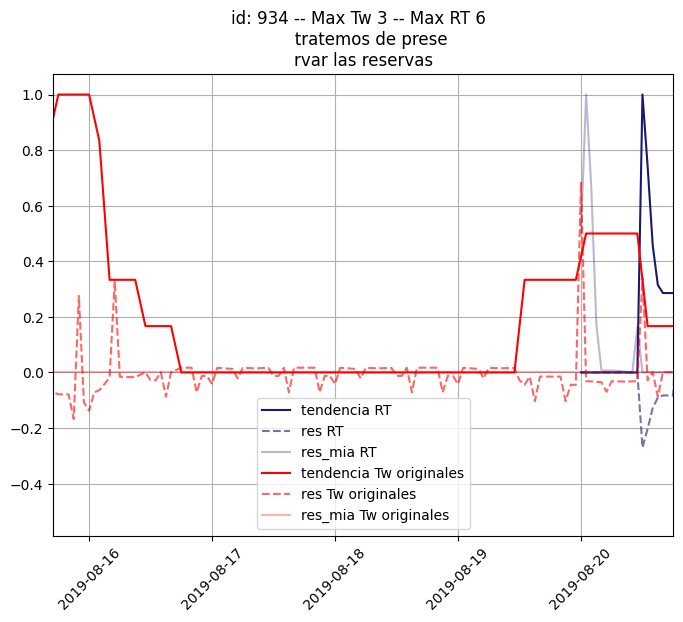


 NUEVO METODO 1.1924673139200739

 NUEVO METODO 1.9645864178304804


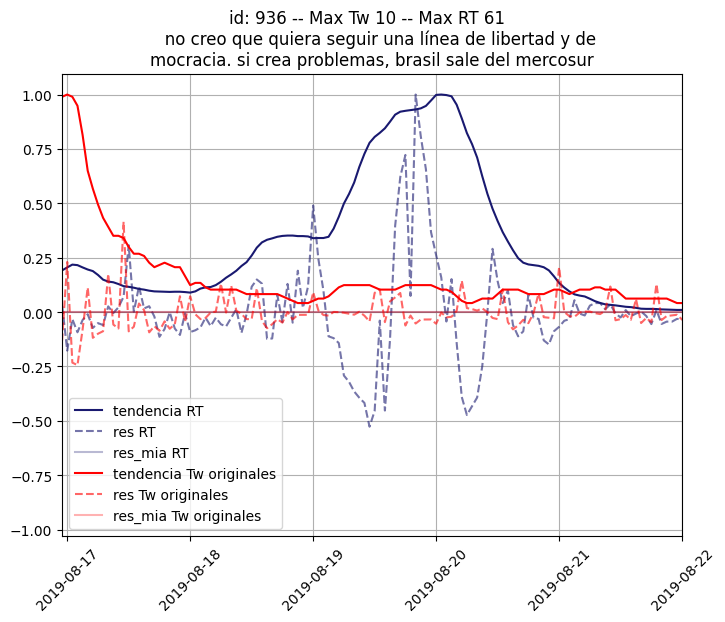


 NUEVO METODO 2.5161149793124995

 NUEVO METODO 5.149956229304338


<Figure size 800x600 with 0 Axes>

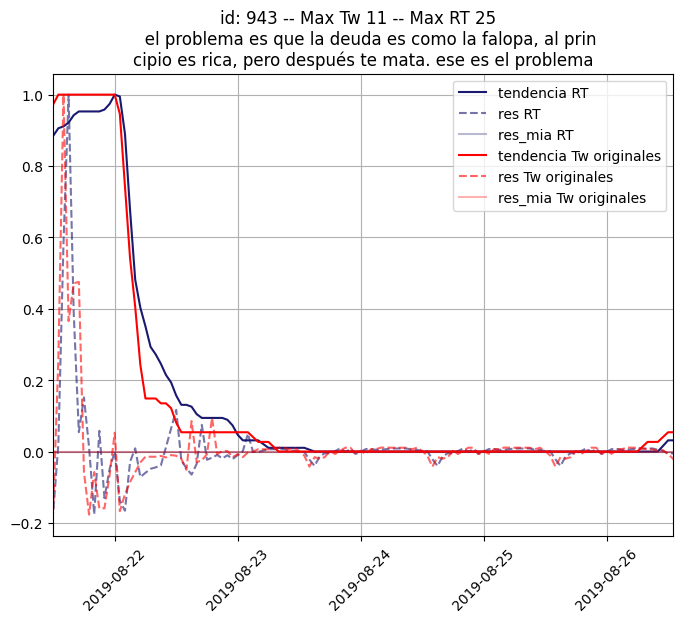


 NUEVO METODO 0.8362841760822871

 NUEVO METODO 1.149011927553442


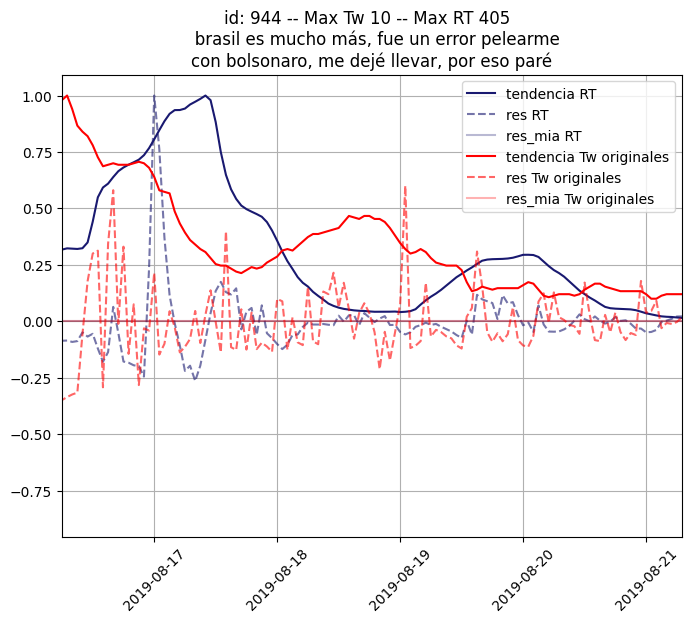


 NUEVO METODO 2.5603717039776663

 NUEVO METODO 3.5582522807841044


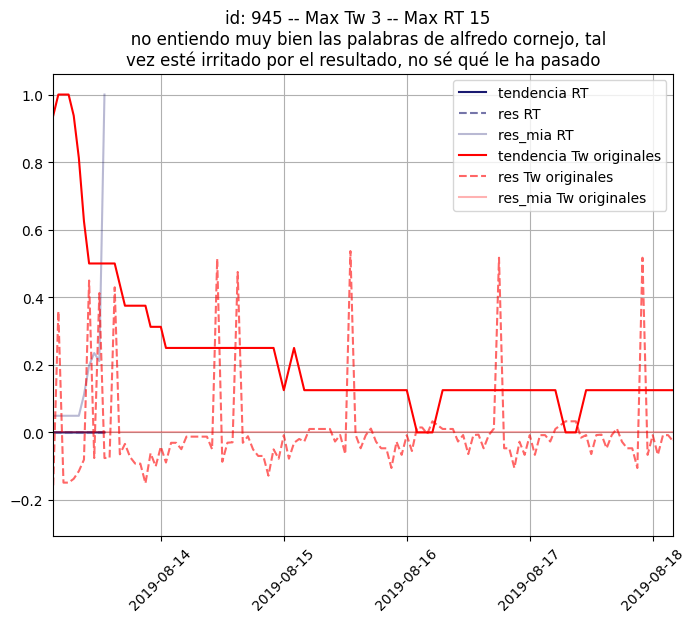


 NUEVO METODO 2.9057346009908653

 NUEVO METODO 1.316289519180425


<Figure size 800x600 with 0 Axes>

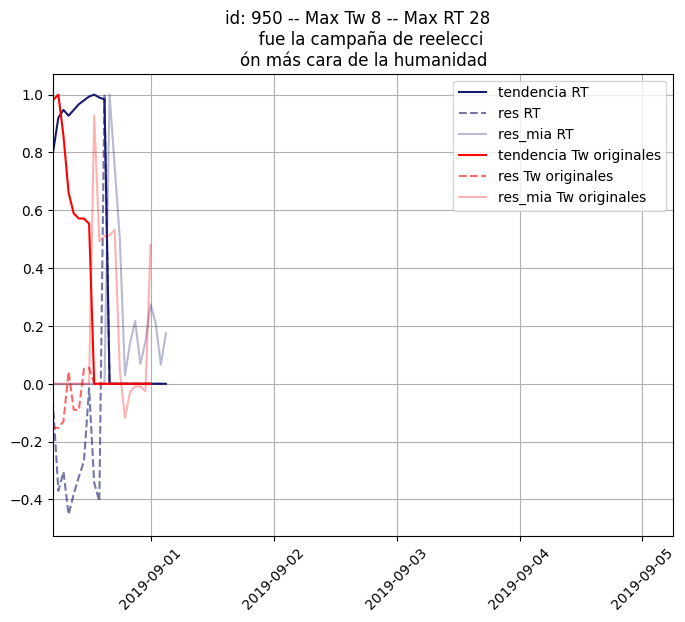


 NUEVO METODO 1.6926809343874096

 NUEVO METODO 1.9238929090065897


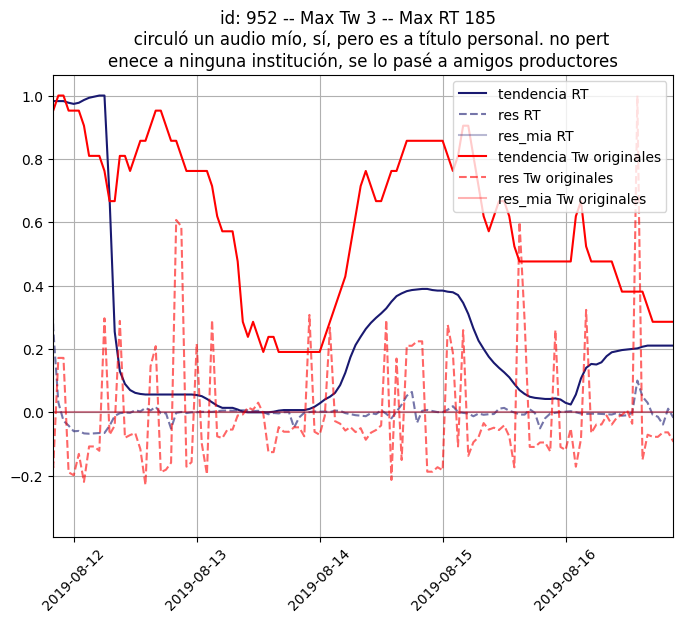


 NUEVO METODO 2.073746354747753

 NUEVO METODO 2.744407744740685


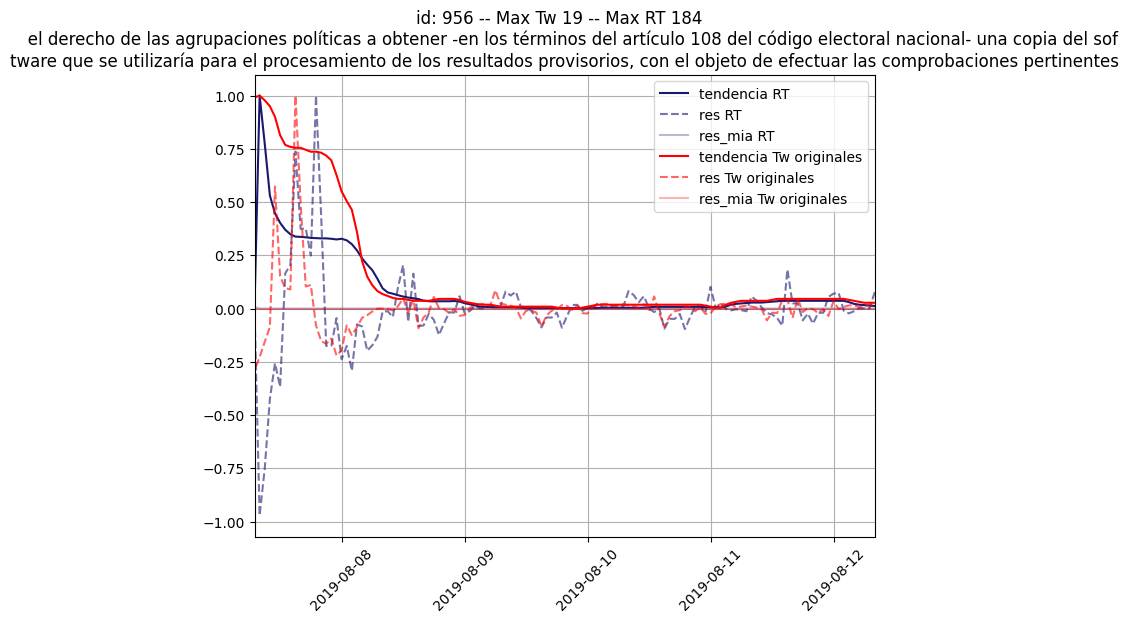


 NUEVO METODO 5.553195877813029

 NUEVO METODO 3.12377138204287


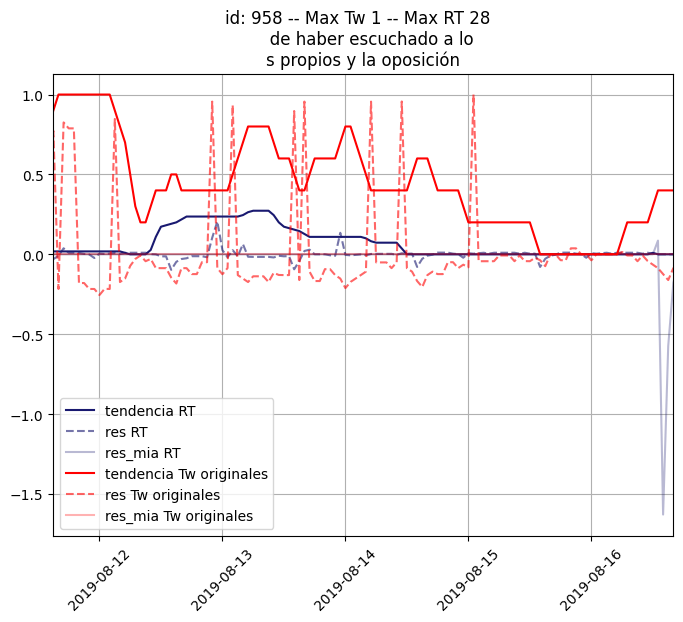


 NUEVO METODO 2.0395971063375664

 NUEVO METODO 1.4048430918146366


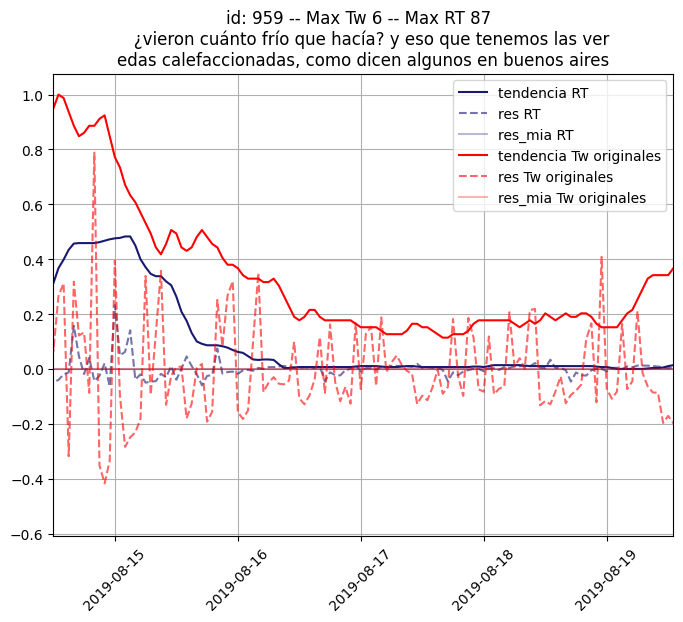

In [10]:
mes = 'August'
path =  'd:/Git_Proyects/Tesis/Faiss_vect/'
citas = pk.load(open(path+f'cita_media_cluster_{mes}.pk', 'rb'))
archivos = os.listdir(path+f'Tw_mas_RT_{mes}')
archivos = os.listdir(path+f'Tw_mas_RT_all')


for archivo in archivos[-20:-8]:
    try:
        patron = re.compile(r'_(\d+).csv')
        coincidencia = patron.search(archivo)
        index = coincidencia.group(1)

    #    df_clus_completo = pd.read_csv(path+f'Tw_mas_RT_{mes}/'+archivo)
        df_clus_completo = pd.read_csv(path+f'Tw_mas_RT_all/'+archivo)
        df_clus_completo['Fecha'] = pd.to_datetime(df_clus_completo['Fecha'], format='%a %b %d %H:%M:%S +0000 %Y')  
        df_clus_completo['HorasDesdeInicio'] = (df_clus_completo['Fecha'] - df_clus_completo['Fecha'].min()).dt.total_seconds() / 3600
            
        categoria = 'RT'

        df_categoria_true = df_clus_completo[df_clus_completo[categoria] == True]
        df_categoria_false = df_clus_completo[df_clus_completo[categoria] == False]

        df_categoria = [df_categoria_true, df_categoria_false]
        labels = ['RT', 'Tw originales']
        t,ch = graficar_y_guardar(df_categoria, citas, int(index), df_clus_completo)
    except:
        pass

In [18]:
t
x = np.arange(0, len(t.values), 1)
#popt, pcov = curve_fit(funcion_exponencial, x, np.array(t.values()), p0=[1,-1,1])
#print('AJUSTEEEEE', popt, '\n')
pd.to_numeric(t.index)
len(x), len(t.values)
fecha_max_apariciones = t.idxmax()
fecha_inicio = fecha_max_apariciones - pd.Timedelta(hours=1)
fecha_fin = fecha_max_apariciones + pd.Timedelta(days=5)
aaa = t[t.index>fecha_inicio]
aaa = aaa[aaa.index<fecha_fin]
aaa
#t.index>pd.to_datetime('2019-10-03 00:00:00')

Fecha
2019-10-07 08:00:00    2.354167
2019-10-07 09:00:00    2.354167
2019-10-07 10:00:00    2.333333
2019-10-07 11:00:00    2.187500
2019-10-07 12:00:00    1.833333
                         ...   
2019-10-12 03:00:00    0.125000
2019-10-12 04:00:00    0.125000
2019-10-12 05:00:00    0.145833
2019-10-12 06:00:00    0.166667
2019-10-12 07:00:00    0.166667
Freq: H, Name: trend, Length: 120, dtype: float64

In [40]:
largo_tot = 3000
largo_citas = np.zeros(len(citas[0:largo_tot]))
for i,cit in enumerate(citas[0:largo_tot]):
    largo_citas[i]  = len(cit.split(" "))

Text(0, 0.5, 'Densidad de apariciones')

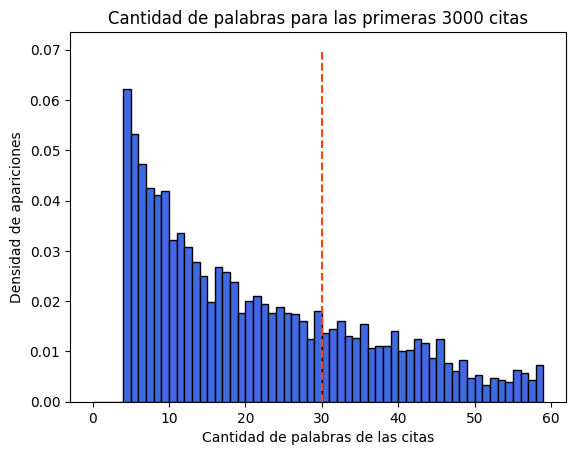

In [41]:
b = np.arange(0, max(largo_citas), 1)
plt.title('Cantidad de palabras para las primeras 3000 citas')
plt.hist(largo_citas, bins = b, edgecolor = 'k', density=True, color  = 'royalblue')
plt.vlines(x =  30, ymin=0, ymax = 0.07, linestyle = 'dashed',  color = 'orangered')
plt.xlabel('Cantidad de palabras de las citas')
plt.ylabel('Densidad de apariciones')

In [25]:
len(np.where(largo_citas>30)[0])

343

In [21]:
citas[1479]

"es un abuso de poder, la diputada no puede gritar 'soy diputada', el rol de diputada no le da la capacidad para intervenir en una situación policial, más aún cuando la persona que estaba siendo registrada era, además, alguien que tenía una buena cantidad de capturas y había cometido un delito en ese mismo momento"